# Time Series Analysis

## Loading and preparing data

Loading data from [Arrivals at tourist accommodation establishments](https://ec.europa.eu/eurostat/web/tourism/data/database) provided by Eurostat

In [48]:
import pandas as pd

df = pd.read_csv('source/tour_occ_arm.tsv', sep='\t', na_values=': ')
df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,109,110,111,112,125,126,127,128,129,130,131,132,133,134,135,136,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,"c_resid,unit,nace_r2,geo\time",2022M04,2022M03,2022M02,2022M01,2021M12,2021M11,2021M10,2021M09,2021M08,...,1990M10,1990M09,1990M08,1990M07,1990M06,1990M05,1990M04,1990M03,1990M02,1990M01
0,"DOM,NR,I551,AL",NaN,31761 e,35551 e,37304 e,41636 e,32897 e,33916 e,47912 e,91353 e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"DOM,NR,I551,AT",NaN,680242,649287,539601,318146,415244,989519,1108301,1325158,...,365644.0,437197.0,451600.0,410852.0,402935.0,357756.0,296037.0,357811.0,330121.0,266230.0
2,"DOM,NR,I551,BE",NaN,397127,325543,284400,338310,372601,443372,439419,528126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"DOM,NR,I551,BG",NaN,224482,206135,188719,205099,139072,192263,334894,576847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"DOM,NR,I551,CH",NaN,831017,751113,614597,688729,584084,973563,1069163,1234215,...,495470.0,596123.0,544021.0,528345.0,473351.0,370942.0,342186.0,426512.0,337820.0,306973.0


In [49]:
df.shape

(2358, 389)

In [50]:
df.columns

Index(['c_resid,unit,nace_r2,geo\time', '2022M04 ', '2022M03 ', '2022M02 ',
       '2022M01 ', '2021M12 ', '2021M11 ', '2021M10 ', '2021M09 ', '2021M08 ',
       ...
       '1990M10 ', '1990M09 ', '1990M08 ', '1990M07 ', '1990M06 ', '1990M05 ',
       '1990M04 ', '1990M03 ', '1990M02 ', '1990M01 '],
      dtype='object', length=389)

In [51]:
df[['c_resid', 'unit', 'nace_r2', 'geo_time']] = df['c_resid,unit,nace_r2,geo\\time'].str.split(',',expand=True)
df.head()

,"c_resid,unit,nace_r2,geo\time",2022M04,2022M03,2022M02,2022M01,2021M12,2021M11,2021M10,2021M09,2021M08,...,1990M06,1990M05,1990M04,1990M03,1990M02,1990M01,c_resid,unit,nace_r2,geo_time
0,"DOM,NR,I551,AL",NaN,31761 e,35551 e,37304 e,41636 e,32897 e,33916 e,47912 e,91353 e,...,NaN,NaN,NaN,NaN,NaN,NaN,DOM,NR,I551,AL
1,"DOM,NR,I551,AT",NaN,680242,649287,539601,318146,415244,989519,1108301,1325158,...,402935.0,357756.0,296037.0,357811.0,330121.0,266230.0,DOM,NR,I551,AT
2,"DOM,NR,I551,BE",NaN,397127,325543,284400,338310,372601,443372,439419,528126,...,NaN,NaN,NaN,NaN,NaN,NaN,DOM,NR,I551,BE
3,"DOM,NR,I551,BG",NaN,224482,206135,188719,205099,139072,192263,334894,576847,...,NaN,NaN,NaN,NaN,NaN,NaN,DOM,NR,I551,BG
4,"DOM,NR,I551,CH",NaN,831017,751113,614597,688729,584084,973563,1069163,1234215,...,473351.0,370942.0,342186.0,426512.0,337820.0,306973.0,DOM,NR,I551,CH


In [52]:
len(df['geo_time'].unique())

42

Selecting only Italy

In [53]:
df = df[df['geo_time'] == 'IT']
df.head(5)

,"c_resid,unit,nace_r2,geo\time",2022M04,2022M03,2022M02,2022M01,2021M12,2021M11,2021M10,2021M09,2021M08,...,1990M06,1990M05,1990M04,1990M03,1990M02,1990M01,c_resid,unit,nace_r2,geo_time
22,"DOM,NR,I551,IT",NaN,2488832,2297485,2090817,3177735,2292653,3284826,4397158,6720505,...,2993632.0,2765215.0,3290894.0,2643010.0,2073904.0,1948743.0,DOM,NR,I551,IT
64,"DOM,NR,I551-I553,IT",NaN,3016934,2808218,2572905,3819739,2742143,4191171,5919638,10118081,...,3548646.0,2968049.0,3521860.0,2742949.0,2152326.0,2018039.0,DOM,NR,I551-I553,IT
106,"DOM,NR,I552,IT",NaN,499462,468523,445824,598990,431913,816505,1181943,2374857,...,NaN,NaN,NaN,NaN,NaN,NaN,DOM,NR,I552,IT
148,"DOM,NR,I552_I553,IT",NaN,528102,510733,482088,642004,449490,906345,1522480,3397576,...,555014.0,202834.0,230966.0,99939.0,78422.0,69296.0,DOM,NR,I552_I553,IT
190,"DOM,NR,I553,IT",NaN,28640,42210,36264,43014,17577,89840,340537,1022719,...,NaN,NaN,NaN,NaN,NaN,NaN,DOM,NR,I553,IT


In [54]:
df.shape

(60, 393)

In [55]:
df.unit.value_counts()

NR           18
PCH_SM       18
PCH_SM_19    15
PCH_SM_2Y     9
Name: unit, dtype: int64

In [56]:
df = df[df['unit'] == 'NR']
df.shape

(18, 393)

In [57]:
df.c_resid.value_counts()

DOM      5
FOR      5
TOTAL    5
NAT      3
Name: c_resid, dtype: int64

In [58]:
df = df[df['c_resid'] == 'TOTAL']
df.shape

(5, 393)

In [59]:
df.nace_r2.value_counts()

I551         1
I551-I553    1
I552         1
I552_I553    1
I553         1
Name: nace_r2, dtype: int64

In [60]:
df = df[df['nace_r2'] == 'I551']

In [61]:
df.head()

,"c_resid,unit,nace_r2,geo\time",2022M04,2022M03,2022M02,2022M01,2021M12,2021M11,2021M10,2021M09,2021M08,...,1990M06,1990M05,1990M04,1990M03,1990M02,1990M01,c_resid,unit,nace_r2,geo_time
1669,"TOTAL,NR,I551,IT",NaN,3892999,3464820,3034874,4258208,3159371,5389662,7413684,10119537,...,5001834.0,4738376.0,5107712.0,3774702.0,2871632.0,2543920.0,TOTAL,NR,I551,IT


In [62]:
df = df.drop(['c_resid,unit,nace_r2,geo\\time', 'c_resid', 'unit', 'nace_r2', 'geo_time'], axis=1)

Drop NaN rows

In [63]:
df = df.dropna(axis=1)

Transpose rows and columns

In [64]:
df = df.T

In [65]:
df.head(10)

,1669
2022M03,3892999
2022M02,3464820
2022M01,3034874
2021M12,4258208
2021M11,3159371
2021M10,5389662
2021M09,7413684
2021M08,10119537
2021M07,8848323
2021M06,5722586


In [66]:
df = df.reset_index()

In [67]:
df['index'] = df['index'].str.replace('M', '-').str.strip() + '-01'
df.head()

,index,1669
0,2022-03-01,3892999
1,2022-02-01,3464820
2,2022-01-01,3034874
3,2021-12-01,4258208
4,2021-11-01,3159371


In [68]:
df = df.rename(columns={'index' : 'ds', 1669 : 'y'})
df.head(5)

,ds,y
0,2022-03-01,3892999
1,2022-02-01,3464820
2,2022-01-01,3034874
3,2021-12-01,4258208
4,2021-11-01,3159371


Correcting types

In [69]:
df.dtypes

ds    object
y     object
dtype: object

In [70]:
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [71]:
df.shape

(387, 2)

Reverse dataframe

In [72]:
df = df.iloc[::-1]
df.reset_index(inplace=True)
df.drop(['index'], axis=1,inplace=True)
df.head()

,ds,y
0,1990-01-01,2543920.0
1,1990-02-01,2871632.0
2,1990-03-01,3774702.0
3,1990-04-01,5107712.0
4,1990-05-01,4738376.0


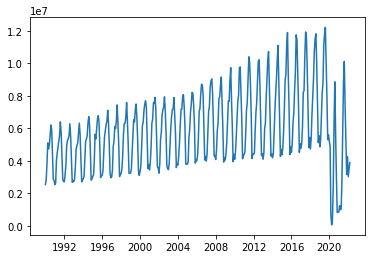

In [73]:
import matplotlib.pyplot as plt

plt.plot(df['ds'], df['y'])
plt.show()

## Checking Stationarity

In [74]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(df):
    df2 = df.set_index('ds')
    ts = df['y']
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        return True
    else:
        return False

In [75]:
test_result = is_stationary(df)
if test_result == True:
    print('The series is stationary')
else:
    print('The series is NOT stationary')

The series is stationary


## Building the model

### Without Changepoints

In [29]:
import os
os.environ['COMET_AUTO_LOG_FIGURES'] = '1'

In [30]:
from comet_ml import Experiment

experiment = Experiment()
experiment.set_name('WithoutBreakPoints')

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/Users/angelica/Packt/Comet/Code/11' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/packt/time-series-analysis/63c370d9d76a4cb3841cd46bdd96f57e



Splitting the time series into training and test set.

In [76]:
index = df.index[df['ds'] == '2021-01-01'].tolist()[0]
n = df.shape[0] - index
df_train = df.head(index)
df_test = df.tail(n)

In [77]:
n

15

In [92]:
from prophet import Prophet

m = Prophet()
m.fit(df_train)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
start chain 1
finish chain 1


In [93]:
future = m.make_future_dataframe(periods=n,freq='MS')
forecast = m.predict(future)

In [94]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
382,2021-11-01,6.580979e+06,3.028492e+06,5.483765e+06,6.576649e+06,6.585039e+06,-2.251236e+06,-2.251236e+06,-2.251236e+06,-2.251236e+06,-2.251236e+06,-2.251236e+06,0.0,0.0,0.0,4.329743e+06
383,2021-12-01,6.575458e+06,3.234573e+06,5.782055e+06,6.570456e+06,6.580231e+06,-2.103946e+06,-2.103946e+06,-2.103946e+06,-2.103946e+06,-2.103946e+06,-2.103946e+06,0.0,0.0,0.0,4.471512e+06
384,2022-01-01,6.569754e+06,3.201414e+06,5.682851e+06,6.563968e+06,6.575532e+06,-2.071518e+06,-2.071518e+06,-2.071518e+06,-2.071518e+06,-2.071518e+06,-2.071518e+06,0.0,0.0,0.0,4.498236e+06
385,2022-02-01,6.564049e+06,3.597343e+06,6.141942e+06,6.557193e+06,6.570830e+06,-1.709912e+06,-1.709912e+06,-1.709912e+06,-1.709912e+06,-1.709912e+06,-1.709912e+06,0.0,0.0,0.0,4.854137e+06
386,2022-03-01,6.558897e+06,4.313903e+06,6.916717e+06,6.551112e+06,6.566484e+06,-8.836129e+05,-8.836129e+05,-8.836129e+05,-8.836129e+05,-8.836129e+05,-8.836129e+05,0.0,0.0,0.0,5.675284e+06


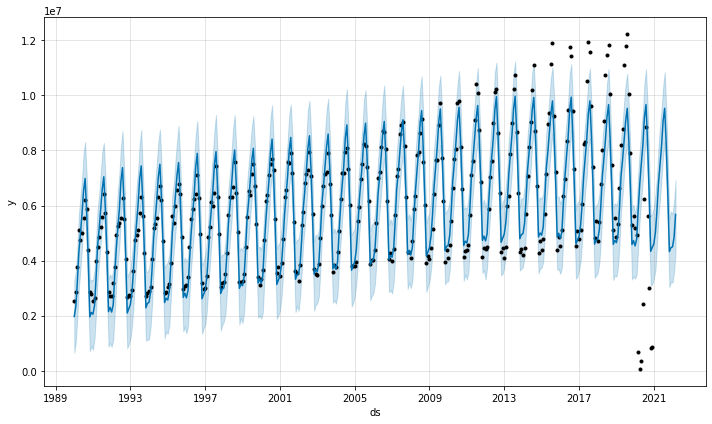

In [95]:
fig1 = m.plot(forecast)
experiment.log_figure(figure_name='forecast', figure=fig1)

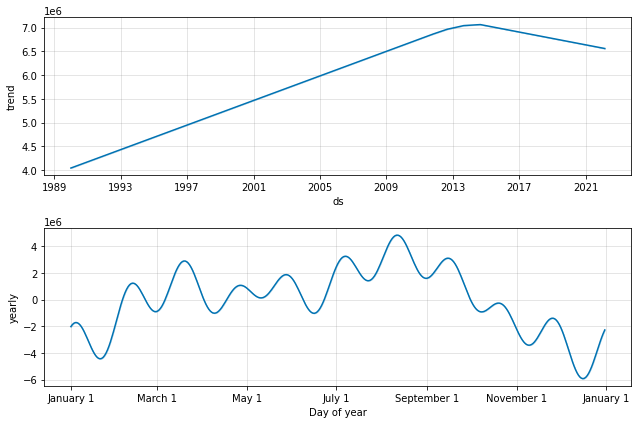

In [89]:
fig2 = m.plot_components(forecast)
experiment.log_figure(figure_name='components', figure=fig2)

In [90]:
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial="0 days", period="720 days", horizon="9490 days")

Making 3 forecasts with cutoffs between 1990-12-29 00:00:00 and 1994-12-08 00:00:00
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

n_changepoints greater than number of observations. Using 8.
start chain 1
finish chain 1
start chain 1
finish chain 1
start chain 1
finish chain 1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


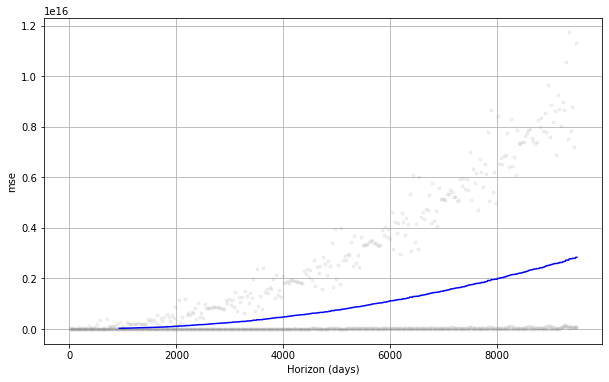

In [91]:
fig3 = plot_cross_validation_metric(df_cv, "mse")
experiment.log_figure(figure_name='mse', figure=fig3)

Measuring metrics

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

def log_metrics(ds, forecast):
    df_merge = pd.merge(df[['ds', 'y']], forecast[['ds','yhat']],on='ds')
    y_true = df_merge['y'].values
    y_pred = df_merge['yhat'].values
    metrics = {}
    metrics['mae'] = mean_absolute_error(y_true, y_pred)
    metrics['mape'] = mean_absolute_percentage_error(y_true, y_pred)
    metrics['rmse'] = mean_squared_error(y_true, y_pred, squared=False)
    experiment.log_metrics(metrics)

In [42]:
log_metrics(df,forecast)

In [43]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/packt/time-series-analysis/63c370d9d76a4cb3841cd46bdd96f57e
COMET INFO:   Metrics:
COMET INFO:     mae  : 622679.1505591891
COMET INFO:     mape : 0.5145425682174353
COMET INFO:     rmse : 1122731.5390681012
COMET INFO:   Others:
COMET INFO:     Name : WithoutBreakPoints
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 3
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting

### With Changepoints

Setting a changepoint at the beginning of Covid-19

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/Users/angelica/Packt/Comet/Code/11' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/packt/time-series-analysis/bfb9afa66b7c4feb93b645d684d1e918

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
start chain 1
finish chain 1
Optimization terminated abnormally. Falling back to Newton.
start chain 1
finish chain 1
Making 4 forecasts with cutoffs between 1990-04-08 00:00:00 and 1996-03-07 00:00:00
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/4 [00:00<?, ?it/s]

start chain 1
finish chain 1
start chain 1
finish chain 1
start chain 1
finish chain 1
start chain 1
finish chain 1
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:  

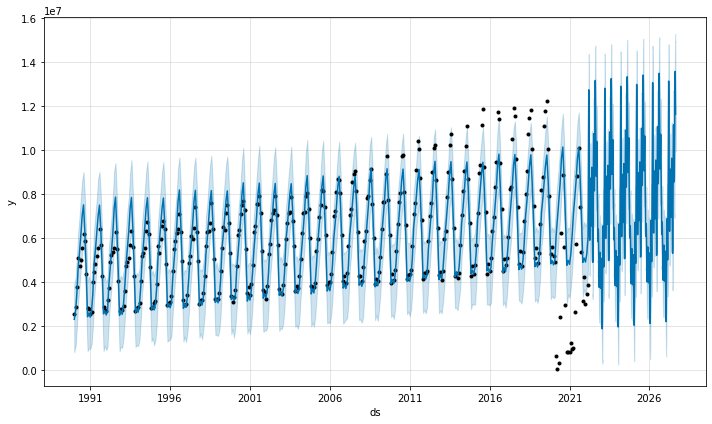

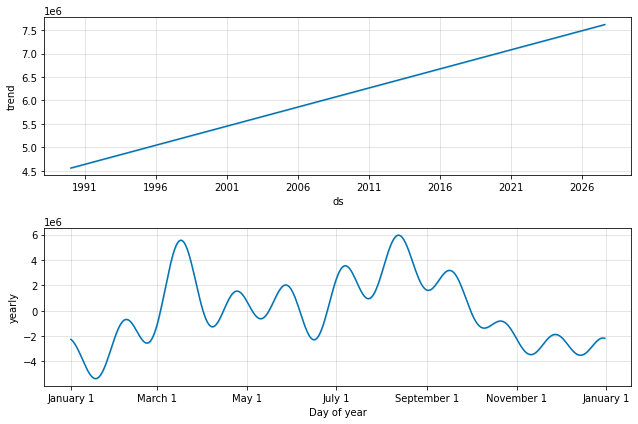

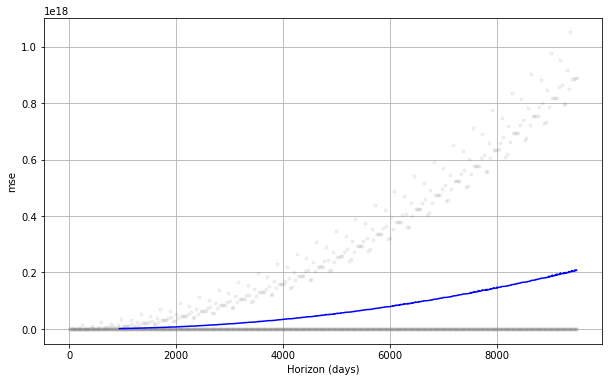

In [44]:
experiment = Experiment()
experiment.set_name('WithBreakPoints')
m = Prophet(changepoints=['2020-03-01'])
m.fit(df_train)
future = m.make_future_dataframe(periods=n,freq='MS')
forecast = m.predict(future)
fig1 = m.plot(forecast)
experiment.log_figure(figure_name='forecast', figure=fig1)
fig2 = m.plot_components(forecast)
experiment.log_figure(figure_name='components', figure=fig2)
df_cv = cross_validation(m, initial="0 days", period="720 days", horizon="9490 days")
fig3 = plot_cross_validation_metric(df_cv, "mse")
experiment.log_figure(figure_name='mse', figure=fig3)

log_metrics(df,forecast)
experiment.end()